# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | tangalle
Processing Record 5 of Set 1 | sandnessjoen
City not found. Skipping...
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | atherton
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | sechura
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | usinsk
Processing Record 12 of Set 1 | qamdo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | kingston
Processing Record 16 of Set 1 | fukuecho
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | gogrial
Processing Record 19 of Set 1 | haiku-pauwela
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | iqaluit
Processi

Processing Record 39 of Set 4 | brookings
Processing Record 40 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 4 | verkhnevilyuysk
Processing Record 42 of Set 4 | sur
Processing Record 43 of Set 4 | constantia
Processing Record 44 of Set 4 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | globe
City not found. Skipping...
Processing Record 47 of Set 4 | rumbek
Processing Record 48 of Set 4 | karatsu
Processing Record 49 of Set 4 | tarawa
Processing Record 0 of Set 5 | kita
Processing Record 1 of Set 5 | pyu
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | hadibu
Processing Record 4 of Set 5 | susuman
Processing Record 5 of Set 5 | san rafael
Processing Record 6 of Set 5 | khorixas
Processing Record 7 of Set 5 | kalabo
Processing Record 8 of Set 5 | castillos
Processing Record 9 of Set 5 | haparanda
Processing Record 10 of Set 5 | ahau
City not found. Skipping...
P

Processing Record 32 of Set 8 | dogondoutchi
Processing Record 33 of Set 8 | st. john's
Processing Record 34 of Set 8 | island harbour
Processing Record 35 of Set 8 | kedougou
Processing Record 36 of Set 8 | leava
Processing Record 37 of Set 8 | namibe
Processing Record 38 of Set 8 | mococa
Processing Record 39 of Set 8 | naliya
Processing Record 40 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 41 of Set 8 | great falls
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | priozersk
Processing Record 44 of Set 8 | la ferte-sous-jouarre
Processing Record 45 of Set 8 | san luis
Processing Record 46 of Set 8 | lubango
Processing Record 47 of Set 8 | serdar
Processing Record 48 of Set 8 | kulia village
City not found. Skipping...
Processing Record 49 of Set 8 | kushiro
Processing Record 0 of Set 9 | agva
City not found. Skipping...
Processing Record 1 of Set 9 | suchiapa
Processing Record 2 of Set 9 | bilovods'k
Processing Record 3 of Set 9 | preobraz

Processing Record 20 of Set 12 | znamenskoye
Processing Record 21 of Set 12 | constitucion
Processing Record 22 of Set 12 | kousseri
Processing Record 23 of Set 12 | les cayes
Processing Record 24 of Set 12 | marsh harbour
Processing Record 25 of Set 12 | genoa
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | gassol
Processing Record 28 of Set 12 | ngorongoro
Processing Record 29 of Set 12 | talanga
Processing Record 30 of Set 12 | san juan de miraflores
Processing Record 31 of Set 12 | berdigestyakh
Processing Record 32 of Set 12 | singkawang
Processing Record 33 of Set 12 | am djarass
City not found. Skipping...
Processing Record 34 of Set 12 | sarpol-e zahab
Processing Record 35 of Set 12 | ocean city
Processing Record 36 of Set 12 | yaren
Processing Record 37 of Set 12 | ploudalmezeau
Processing Record 38 of Set 12 | ust-tsilma
Processing Record 39 of Set 12 | salym
Processing Record 40 of Set 12 | astrakhan
Processing Record 41 of Set 12 | timiryazevs

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Convert Kelvin temperatures to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(lambda x: x - 273.15)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,25.31,90,13,3.13,EC,1688866150
1,punta arenas,-53.1500,-70.9167,-1.94,86,0,3.60,CL,1688866151
2,qaqortoq,60.7167,-46.0333,6.34,87,41,1.60,GL,1688866151
3,tangalle,6.0240,80.7911,27.09,86,100,5.11,LK,1688866152
4,isafjordur,66.0755,-23.1240,11.49,65,0,1.70,IS,1688866153


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\dtrob\\repos\\Challenges\\Challenge 6\\WeatherPy\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,25.31,90,13,3.13,EC,1688866150
1,punta arenas,-53.1500,-70.9167,-1.94,86,0,3.60,CL,1688866151
2,qaqortoq,60.7167,-46.0333,6.34,87,41,1.60,GL,1688866151
3,tangalle,6.0240,80.7911,27.09,86,100,5.11,LK,1688866152
4,isafjordur,66.0755,-23.1240,11.49,65,0,1.70,IS,1688866153


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

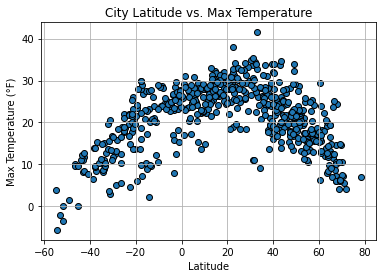

In [11]:
# Build scatter plot for latitude vs. temperature
# Create a scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Set the plot title and axis labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Show the grid
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

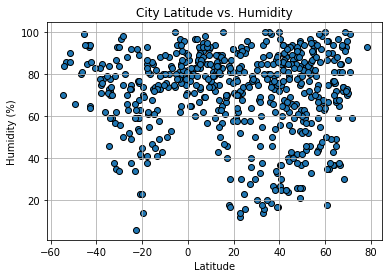

In [12]:
# Build the scatter plots for latitude vs. humidity
# Create a scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Set the plot title and axis labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show the grid
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

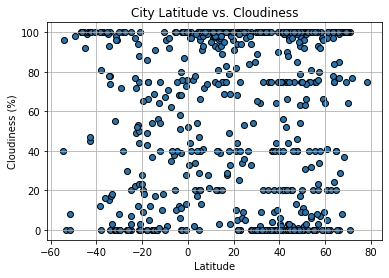

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# Create a scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set the plot title and axis labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show the grid
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

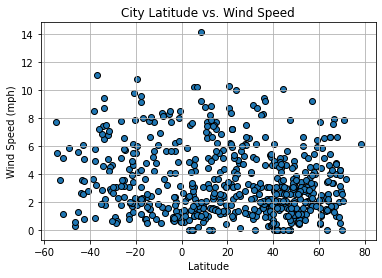

In [14]:
# Build the scatter plots for latitude vs. wind speed
# Create a scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Set the plot title and axis labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show the grid
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label):
    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot of the data points
    plt.scatter(x, y)

    # Create the regression line
    regression_line = slope * x + intercept

    # Plot the regression line
    plt.plot(x, regression_line, color='red')

    # Set labels for the x-axis and y-axis
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add a title to the plot
    plt.title('Linear Regression')

    # Display the plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaqortoq,60.7167,-46.0333,6.34,87,41,1.60,GL,1688866151
3,tangalle,6.0240,80.7911,27.09,86,100,5.11,LK,1688866152
4,isafjordur,66.0755,-23.1240,11.49,65,0,1.70,IS,1688866153
5,atherton,53.5237,-2.4935,17.47,97,100,0.76,GB,1688866153
8,usinsk,65.9939,57.5281,9.51,81,99,3.36,RU,1688866155


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,25.31,90,13,3.13,EC,1688866150
1,punta arenas,-53.1500,-70.9167,-1.94,86,0,3.60,CL,1688866151
6,port mathurin,-19.6833,63.4167,23.53,70,20,10.84,MU,1688866154
7,sechura,-5.5569,-80.8222,23.27,74,100,8.33,PE,1688866154
10,ushuaia,-54.8000,-68.3000,3.81,70,40,7.72,AR,1688866156


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.40187371042946657


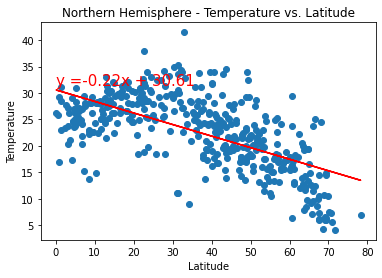

In [18]:
# Linear regression on Northern Hemisphere
#Perform linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot of the data points
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set labels for the x-axis and y-axis
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

R squared: 0.5154580596141806


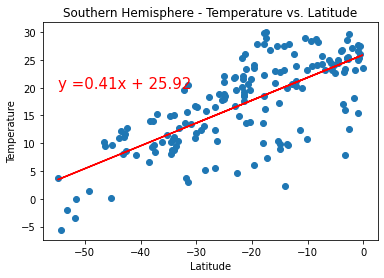

In [19]:
# Linear regression on Southern Hemisphere
# Perform linear regression on Southern Hemisphere data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot the scatter plot and regression line
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set the plot title and axis labels
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

**Discussion about the linear relationship:**

In the Northern Hemisphere plot, the equation of the regression line is negatively sloped and the r-squared value shows a likeliness that the regression models are a good fit to explain the relationship between latitude and temperature. As we move away from the equator for the Northern Hempishere, the colder it gets.

As for the Southern Hempisphere plot, the equation of the regression line is positively sloped and the r-squared value shows a greater linear relationship between latitude and temperature. As we move closer to the equator for the Southern Hempishere, the hotter it gets.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.008756361343134332


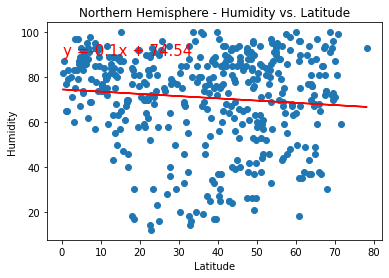

In [20]:
# Northern Hemisphere
#Perform linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot of the data points
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set labels for the x-axis and y-axis
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

R squared: 0.0007322792701031767


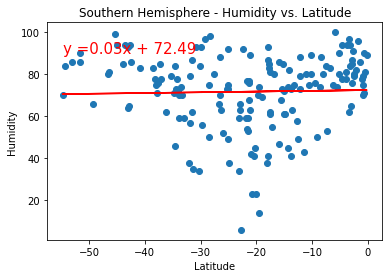

In [21]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot the scatter plot and regression line
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set the plot title and axis labels
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere plot, the equation of the regression line is negatively sloped and the r-squared value shows a likeliness that the regression models are a good fit to explain the relationship between humidity and latitude. As we move away from the equator for the Northern Hempishere, the less humidity there is.

As for the Southern Hempisphere plot, the equation of the regression line is positively sloped and the r-squared value shows a lower, but still possible likeliness that the regression models are a good fit to explain the relationship between humidity latitude. As we move closer to the equator for the Southern Hempishere, the more humid it gets.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.006049587233436311


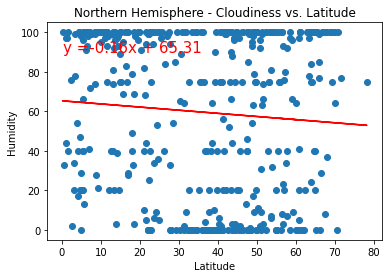

In [22]:
# Northern Hemisphere
#Perform linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot of the data points
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set labels for the x-axis and y-axis
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

R squared: 0.012700009375475784


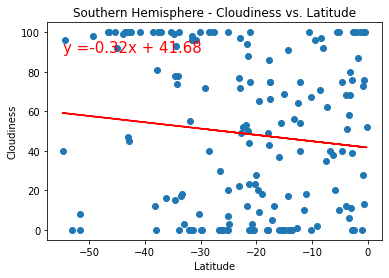

In [23]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot the scatter plot and regression line
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set the plot title and axis labels
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

**Discussion about the linear relationship:** 

Both plots' equation of the regression lines are negatively sloped with r-squared values that show a possible likeliness that the regression models are a good fit to explain the relationship between cloudiness and latitude. As we move away from the equator for the Northern Hempishere, the less cloudiness there is. As we move closer to the equator for the Southern Hempishere, the less cloudiness there is.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.008359434872859069


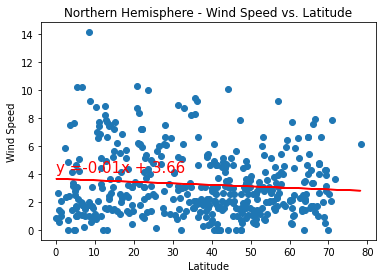

In [24]:
# Northern Hemisphere
#Perform linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot of the data points
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set labels for the x-axis and y-axis
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

R squared: 0.00922744507559395


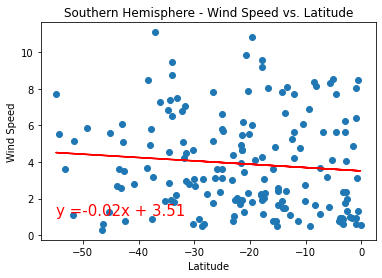

In [25]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot the scatter plot and regression line
plt.scatter(x, y)

# Create the regression line
regress_line = slope * x + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line
plt.plot(x, regress_line, "r-")
plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=15, color="red")

# Set the plot title and axis labels
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"R squared: {r_value**2}")

# Display the plot
plt.show()

**Discussion about the linear relationship:** 

Both plots' equation of the regression lines are negatively sloped with r-squared values that show a possible likeliness that the regression models are a good fit to explain the relationship between wind speed and latitude. As we move away from the equator for the Northern Hempishere, the less wind speed there is. As we move closer to the equator for the Southern Hempishere, the less wind speed there is.